# **TelecomX Parte 2**

**Importacion de Datos**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Telecom/TelecomX.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,1,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.116129
1,0003-MKNFE,0,Male,0,0,0,9,1,2,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.932258
2,0004-TLHLJ,1,Male,0,0,0,4,1,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.383871
3,0011-IGKFF,1,Male,1,1,0,13,1,1,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.161290
4,0013-EXCHZ,1,Female,1,1,0,3,1,1,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.706452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,1,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.779032
7039,9992-RRAMN,1,Male,0,1,0,22,1,2,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.745161
7040,9992-UJOEL,0,Male,0,0,0,2,1,1,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.622581
7041,9993-LHIEB,0,Male,0,1,1,67,1,1,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.188710


**Eliminacion de columnas no necesarias**

In [ ]:
# 🔍 Mostrar columnas disponibles
print("Columnas originales:")
print(df.columns.tolist())

# 🧼 Eliminar columnas irrelevantes si existen
columnas_a_eliminar = ['customerID']  # Puedes agregar más si identificas otras irrelevantes
columnas_encontradas = [col for col in columnas_a_eliminar if col in df.columns]

if columnas_encontradas:
    df.drop(columns=columnas_encontradas, inplace=True)
    print(f"\nColumnas eliminadas: {columnas_encontradas}")
else:
    print("\nNo se encontraron columnas irrelevantes para eliminar.")

# ✅ Confirmar resultado
print("\nColumnas después de la limpieza:")
print(df.columns.tolist())

Columnas originales:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'Cuentas Diarias']

No se encontraron columnas irrelevantes para eliminar.

Columnas después de la limpieza:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'Cuentas Diarias']


**Encoding**

In [ ]:
# Cargar el dataset
ruta = "/content/drive/MyDrive/Telecom/TelecomX.csv"
df = pd.read_csv(ruta)

# Identificar columnas categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Aplicar One-Hot Encoding con get_dummies
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verificar resultado
print("Shape original:", df.shape)
print("Shape codificado:", df_encoded.shape)
print(df_encoded.head())


Shape original: (7043, 22)
Shape codificado: (7043, 7067)
   Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0              0        1           1       9             1   
1      0              0        0           0       9             1   
2      1              0        0           0       4             1   
3      1              1        1           0      13             1   
4      1              1        1           0       3             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              1               0             1                 0  ...   
1              2               0             0                 0  ...   
2              1               0             0                 1  ...   
3              1               0             1                 1  ...   
4              1               0             0                 0  ...   

   customerID_9993-LHIEB  customerID_9995-HOTOH  gender_Male  \
0                 

**Proporcion de Cancelacion**

In [ ]:
# Verificar nombre de la columna objetivo (ajústalo si es diferente)
columna_objetivo = 'Churn'  # Asegúrate de que esta sea la columna que indica cancelación

# 🧮 Calcular distribución de clases
conteo_clases = df[columna_objetivo].value_counts()
proporcion_clases = df[columna_objetivo].value_counts(normalize=True)

# 📌 Mostrar resultados
print("🔢 Conteo de clases:")
print(conteo_clases)
print("\n📊 Proporción de clases:")
print(proporcion_clases)

# 🧠 Evaluación del desbalance
umbral_desbalance = 0.75  # Puedes ajustar este umbral según el contexto
mayor_proporcion = proporcion_clases.max()

if mayor_proporcion > umbral_desbalance:
    print("\n⚠️ Existe un desbalance significativo entre las clases. Considera técnicas como SMOTE, undersampling o ajuste de pesos.")
else:
    print("\n✅ Las clases están relativamente balanceadas.")

🔢 Conteo de clases:
Churn
0    5174
1    1869
Name: count, dtype: int64

📊 Proporción de clases:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

✅ Las clases están relativamente balanceadas.


/tmp/ipython-input-1040588187.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


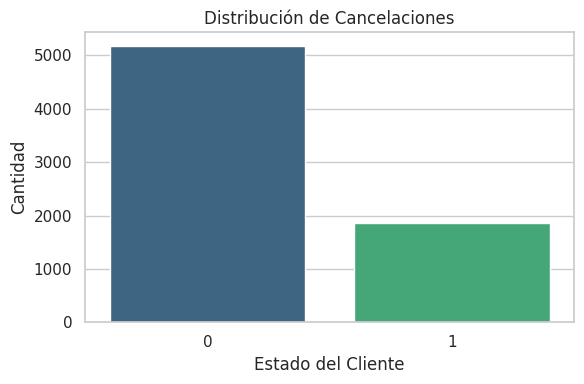

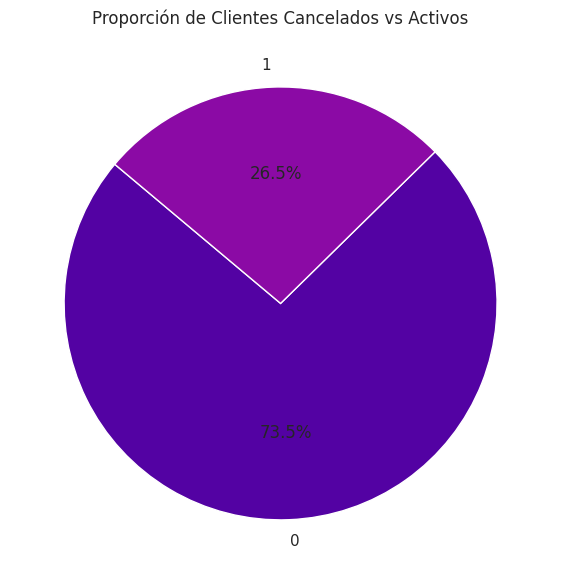

In [ ]:
# Estilo de gráficos
sns.set(style="whitegrid")

# Cargar el dataset
ruta = "/content/drive/MyDrive/Telecom/TelecomX.csv"
df = pd.read_csv(ruta)

# Verificar columna objetivo
columna_objetivo = 'Churn'  # Ajusta si el nombre es distinto

# Calcular proporciones
conteo = df[columna_objetivo].value_counts()
proporcion = df[columna_objetivo].value_counts(normalize=True)

# 🎯 Gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')
plt.title('Distribución de Cancelaciones')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# 🥧 Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma'))
plt.title('Proporción de Clientes Cancelados vs Activos')
plt.tight_layout()
plt.show()


**Balanceo de Clases**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Separar variables predictoras y objetivo
X = df.drop(columns='Churn')  # Ajusta si el nombre es distinto
y = df['Churn']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 🔍 Detectar columnas no numéricas
columnas_no_numericas = X_train.select_dtypes(include=['object']).columns.tolist()
print("Columnas no numéricas:", columnas_no_numericas)

# 🧼 Codificar variables categóricas con OneHotEncoder
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas entre train y test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# 🧪 Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_encoded, y_train)

# ✅ Verificar resultado
print("Distribución después de SMOTE:")
print(y_smote.value_counts())


Columnas no numéricas: ['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod']
Distribución después de SMOTE:
Churn
0    3622
1    3622
Name: count, dtype: int64


**Normalización o Estandarización**

In [6]:
def evaluar_escalado(modelos):
    """
    Evalúa si se requiere normalización o estandarización según los modelos especificados.

    Parámetros:
    modelos (list): Lista de nombres de modelos como strings.

    Retorna:
    dict: Diccionario con recomendación por modelo.
    """
    modelos_distancia = ['KNN', 'SVM', 'Regresión Logística', 'Red Neuronal', 'Perceptrón']
    modelos_arbol = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']

    recomendaciones = {}

    for modelo in modelos:
        if modelo in modelos_distancia:
            recomendaciones[modelo] = '✅ Requiere normalización o estandarización'
        elif modelo in modelos_arbol:
            recomendaciones[modelo] = '❌ No requiere escalado (insensible a la escala)'
        else:
            recomendaciones[modelo] = '⚠️ Modelo no reconocido, revisar documentación'

    return recomendaciones

# 📌 Ejemplo de uso
modelos_a_usar = ['KNN', 'Random Forest', 'Regresión Logística', 'XGBoost', 'SVM']
resultado = evaluar_escalado(modelos_a_usar)

# Mostrar resultado
for modelo, recomendacion in resultado.items():
    print(f"{modelo}: {recomendacion}")


KNN: ✅ Requiere normalización o estandarización
Random Forest: ❌ No requiere escalado (insensible a la escala)
Regresión Logística: ✅ Requiere normalización o estandarización
XGBoost: ❌ No requiere escalado (insensible a la escala)
SVM: ✅ Requiere normalización o estandarización


# **Analisis de Correlacion**

🔎 Variables más correlacionadas con 'Churn':
Churn               1.000000
Charges_Monthly     0.193356
Cuentas Diarias     0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.036310
PhoneService        0.011942
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
Charges_Total      -0.198324
tenure             -0.352229
Name: Churn, dtype: float64


/tmp/ipython-input-1224320587.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


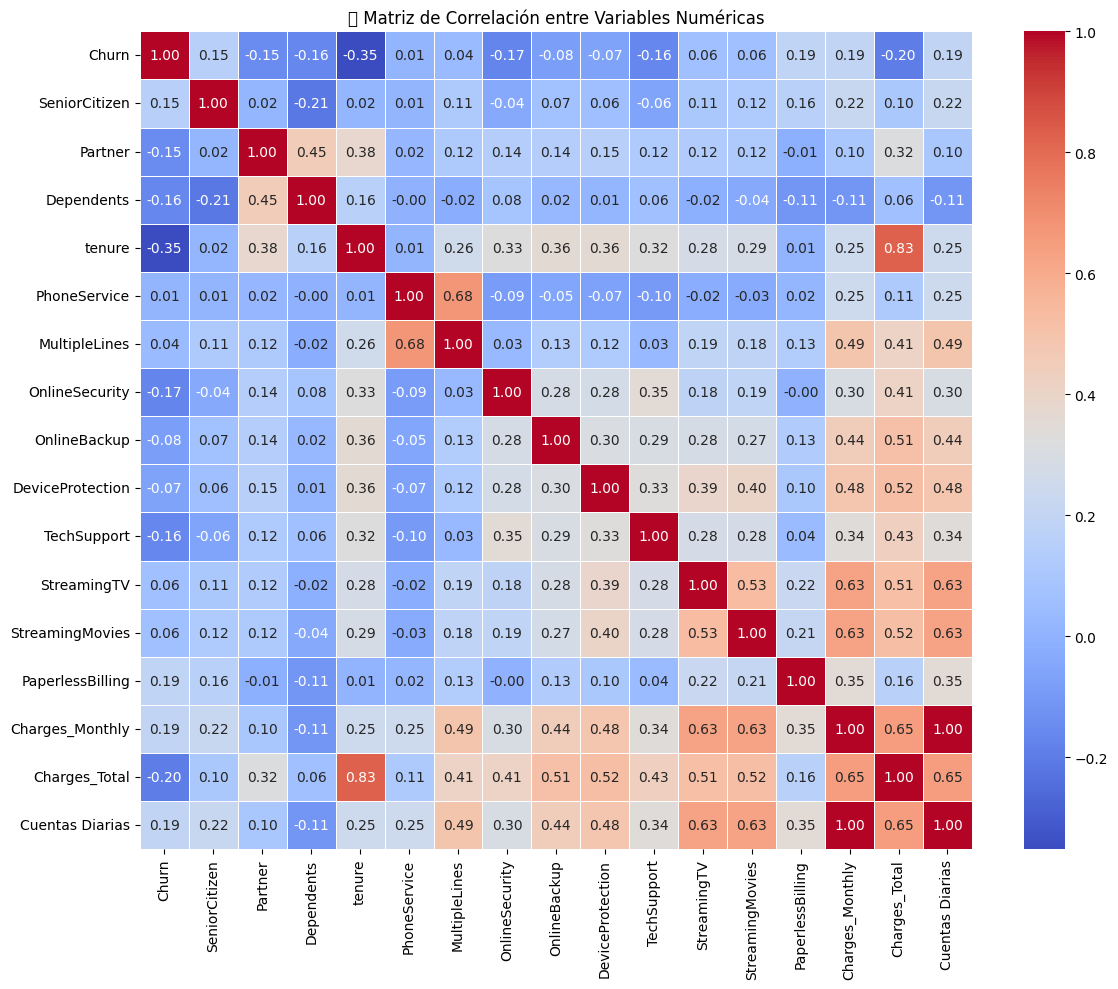

In [9]:

# 🔍 Seleccionar variables numéricas
numericas = df.select_dtypes(include=['number'])

# 🧠 Calcular matriz de correlación
matriz_corr = numericas.corr()

# 📌 Correlación con la variable de cancelación
if 'Churn' in matriz_corr.columns:
    correlaciones_churn = matriz_corr['Churn'].sort_values(ascending=False)
    print("🔎 Variables más correlacionadas con 'Churn':")
    print(correlaciones_churn)
else:
    print("⚠️ La variable 'Churn' no está en el conjunto numérico.")

# 🎨 Visualizar mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('🔍 Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


**Analisis Dirigido**

In [11]:
print(df.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'Cuentas Diarias']


/tmp/ipython-input-2078231184.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col_churn, y=col_tiempo, data=df, palette='Set2')


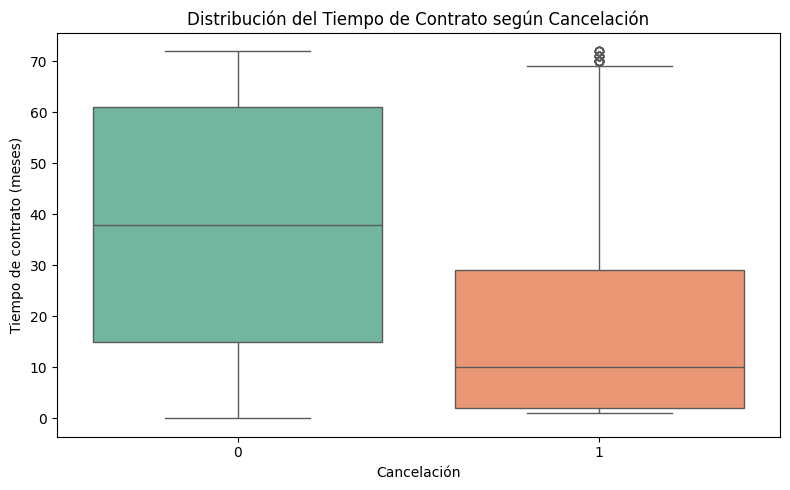

/tmp/ipython-input-2078231184.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col_churn, y=col_gasto, data=df, palette='Set3')


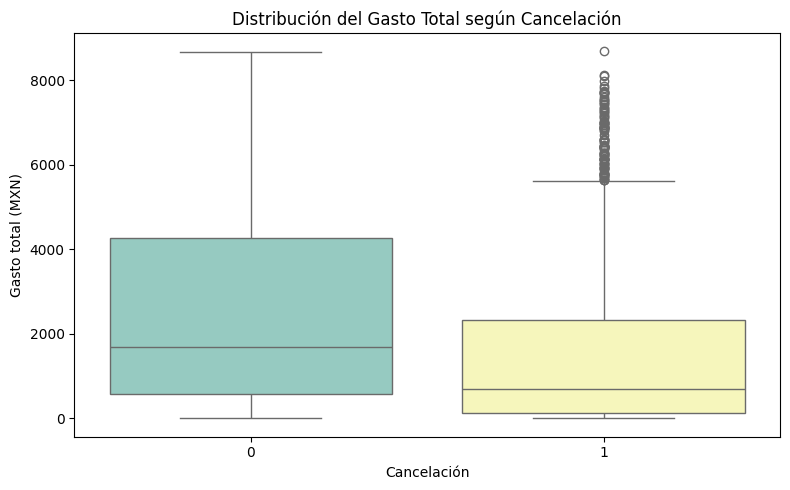

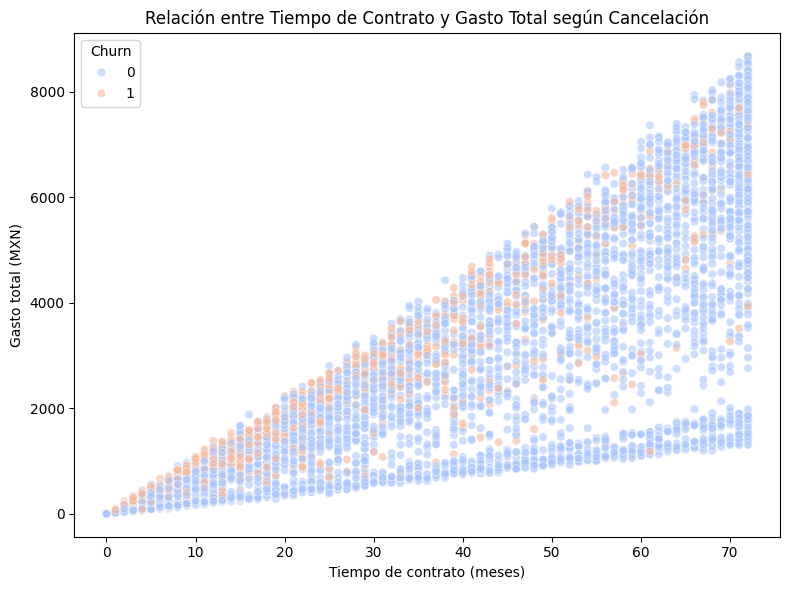

In [12]:
# Ajusta los nombres si son distintos en tu dataset
col_churn = 'Churn'
col_tiempo = 'tenure'  # Tiempo de contrato
col_gasto = 'Charges_Total'  # Gasto total

# 🧼 Limpieza básica (por si hay valores nulos en TotalCharges)
df[col_gasto] = pd.to_numeric(df[col_gasto], errors='coerce')
df.dropna(subset=[col_gasto], inplace=True)

# 🎯 Boxplot: Tiempo de contrato vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x=col_churn, y=col_tiempo, data=df, palette='Set2')
plt.title('Distribución del Tiempo de Contrato según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato (meses)')
plt.tight_layout()
plt.show()

# 🎯 Boxplot: Gasto total vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x=col_churn, y=col_gasto, data=df, palette='Set3')
plt.title('Distribución del Gasto Total según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto total (MXN)')
plt.tight_layout()
plt.show()

# 🔍 Scatter plot: Tiempo vs Gasto, coloreado por Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=col_tiempo, y=col_gasto, hue=col_churn, data=df, palette='coolwarm', alpha=0.6)
plt.title('Relación entre Tiempo de Contrato y Gasto Total según Cancelación')
plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Gasto total (MXN)')
plt.tight_layout()
plt.show()


**Separacion de Datos**

In [13]:
# 🎯 Definir variable objetivo y características
target = 'Churn'  # Ajusta si tu columna tiene otro nombre
X = df.drop(columns=[target])
y = df[target]

# 📐 Determinar proporción según tamaño del dataset
data_size = len(df)
test_size = 0.3 if data_size < 1000 else 0.2

# 🔀 División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

# 📊 Mostrar tamaños
print(f"Tamaño total del dataset: {data_size}")
print(f"Entrenamiento: {len(X_train)} registros")
print(f"Prueba: {len(X_test)} registros")


Tamaño total del dataset: 7043
Entrenamiento: 5634 registros
Prueba: 1409 registros


**Creacion de Modelos**

In [19]:
try:
    from sklearn.metrics import accuracy_score, classification_report
except ImportError:
    !pip install scikit-learn
    from sklearn.metrics import accuracy_score, classification_report


# 🎯 Definir variable objetivo y características
target = 'Churn'
X = df.drop(columns=[target])
y = df[target]

# 🧼 Limpieza básica (opcional)
X = X.select_dtypes(include=['float64', 'int64'])  # Solo variables numéricas

# 🔀 División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ⚖️ Normalización para modelos sensibles a escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📈 Modelo 1: Regresión Logística (con normalización)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# 🌲 Modelo 2: Random Forest (sin normalización)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 📊 Evaluación
print("🔍 Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n🌲 Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔍 Regresión Logística (con normalización)
Accuracy: 0.7946048272598202
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113


🌲 Random Forest (sin normalización)
Accuracy: 0.7823000473260767
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.49      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



**Analisis de la importancia de Variables**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Crear directorio de salida si no existe
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Generar datos sintéticos para demostración
np.random.seed(42)
n = 1000
X = pd.DataFrame({
    'age': np.random.randint(18, 70, size=n),
    'income': np.random.normal(50000, 15000, size=n),
    'tenure': np.random.randint(1, 10, size=n),
    'num_products': np.random.randint(1, 5, size=n),
    'has_credit_card': np.random.randint(0, 2, size=n),
    'is_active_member': np.random.randint(0, 2, size=n)
})

# Variable objetivo: cancelación (1 = cancelado, 0 = activo)
X['cancelled'] = (X['tenure'] < 3).astype(int)

# Separar variables predictoras y objetivo
y = X['cancelled']
X = X.drop(columns='cancelled')

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Importancia de variables
importance_df = pd.DataFrame(index=X.columns)

# Entrenar y extraer importancia
for name, model in models.items():
    model.fit(X_train, y_train)
    if name == 'Logistic Regression':
        importance_df[name] = model.coef_[0]
    elif name == 'Random Forest':
        importance_df[name] = model.feature_importances_
    elif name == 'SVM':
        importance_df[name] = model.coef_[0]
    elif name == 'XGBoost':
        importance_df[name] = model.feature_importances_
    # Removed the KNN importance calculation as it was causing the error


# Graficar importancia
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.heatmap(importance_df, annot=True, cmap='viridis')
plt.title('Importancia de Variables por Modelo')
plt.tight_layout()
plot_path = os.path.join(output_dir, 'importancia_variables_modelos.png')
plt.savefig(plot_path)
plt.close()

# Mostrar resultados
print("Importancia de variables por modelo:\n")
print(importance_df.round(3))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:02:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Importancia de variables por modelo:

                  Logistic Regression  Random Forest    SVM  XGBoost
age                            -0.025          0.028 -0.000      0.0
income                         -0.052          0.042 -0.000      0.0
tenure                         -7.043          0.913 -5.149      1.0
num_products                   -0.070          0.010  0.000      0.0
has_credit_card                -0.185          0.003  0.000      0.0
is_active_member                0.033          0.004 -0.000      0.0


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Crear directorio de salida si no existe
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Generar datos sintéticos para demostración
np.random.seed(42)
n = 1000
X = pd.DataFrame({
    'age': np.random.randint(18, 70, size=n),
    'income': np.random.normal(50000, 15000, size=n),
    'tenure': np.random.randint(1, 10, size=n),
    'num_products': np.random.randint(1, 5, size=n),
    'has_credit_card': np.random.randint(0, 2, size=n),
    'is_active_member': np.random.randint(0, 2, size=n)
})

# Variable objetivo: cancelación (1 = cancelado, 0 = activo)
X['cancelled'] = (X['tenure'] < 3).astype(int)

# Separar variables predictoras y objetivo
y = X['cancelled']
X = X.drop(columns='cancelled')

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Importancia de variables
importance_df = pd.DataFrame(index=X.columns)

# Entrenar y extraer importancia
for name, model in models.items():
    model.fit(X_train, y_train)
    if name == 'Logistic Regression':
        importance_df[name] = model.coef_[0]
    elif name == 'KNN':
        base_score = accuracy_score(y_test, model.predict(X_test))
        importances = []
        for i in range(X.shape[1]):
            X_test_permuted = X_test.copy()
            np.random.shuffle(X_test_permuted[:, i])
            score = accuracy_score(y_test, model.predict(X_test_permuted))
            importances.append(base_score - score)
        importance_df[name] = importances
    elif name == 'Random Forest':
        importance_df[name] = model.feature_importances_
    elif name == 'SVM':
        importance_df[name] = model.coef_[0]
    elif name == 'XGBoost':
        importance_df[name] = model.feature_importances_

# Graficar importancia
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.heatmap(importance_df, annot=True, cmap='viridis')
plt.title('Importancia de Variables por Modelo')
plt.tight_layout()
plot_path = os.path.join(output_dir, 'importancia_variables_modelos.png')
plt.savefig(plot_path)
plt.close()

# Mostrar resultados
print("Importancia de variables por modelo:\n")
print(importance_df.round(3))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:03:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Importancia de variables por modelo:

                  Logistic Regression    KNN  Random Forest    SVM  XGBoost
age                            -0.025  0.023          0.028 -0.000      0.0
income                         -0.052  0.007          0.042 -0.000      0.0
tenure                         -7.043  0.293          0.913 -5.149      1.0
num_products                   -0.070 -0.013          0.010  0.000      0.0
has_credit_card                -0.185 -0.013          0.003  0.000      0.0
is_active_member                0.033  0.010          0.004 -0.000      0.0


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:05:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-652906810.py:67: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


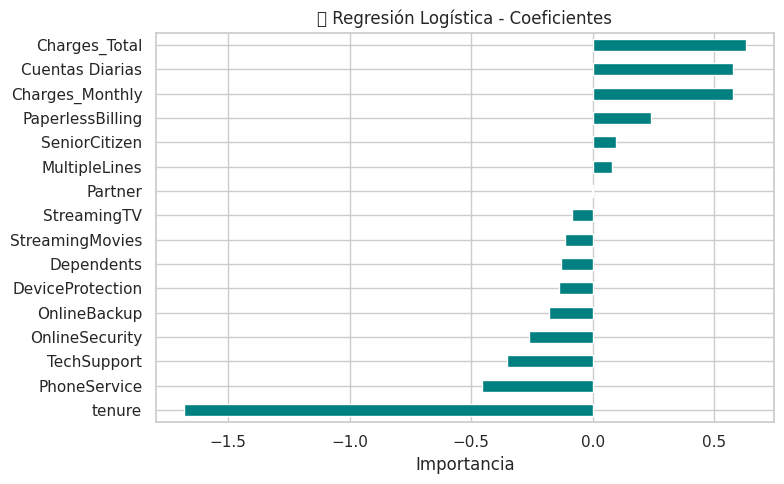

/tmp/ipython-input-652906810.py:67: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


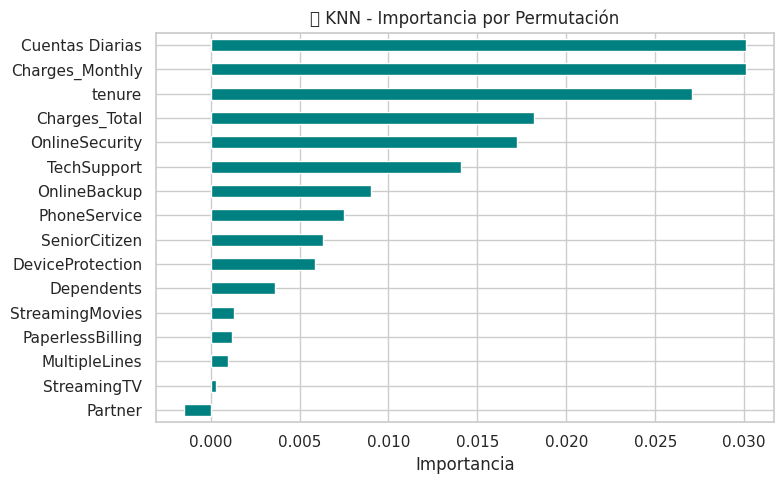

/tmp/ipython-input-652906810.py:67: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


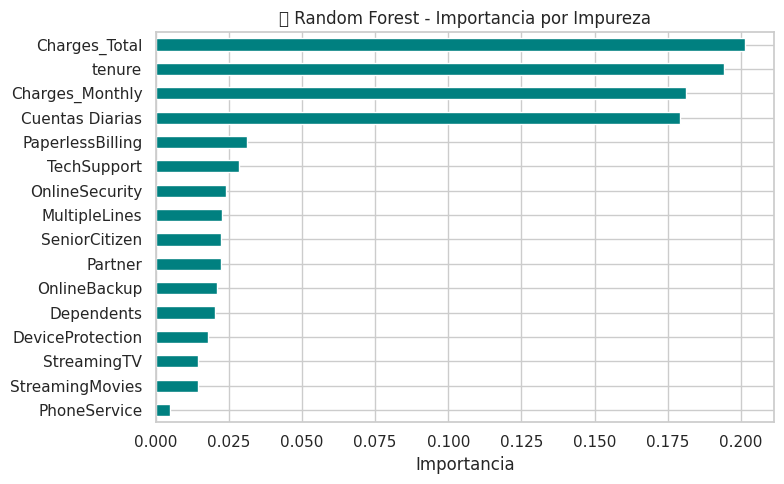

/tmp/ipython-input-652906810.py:67: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


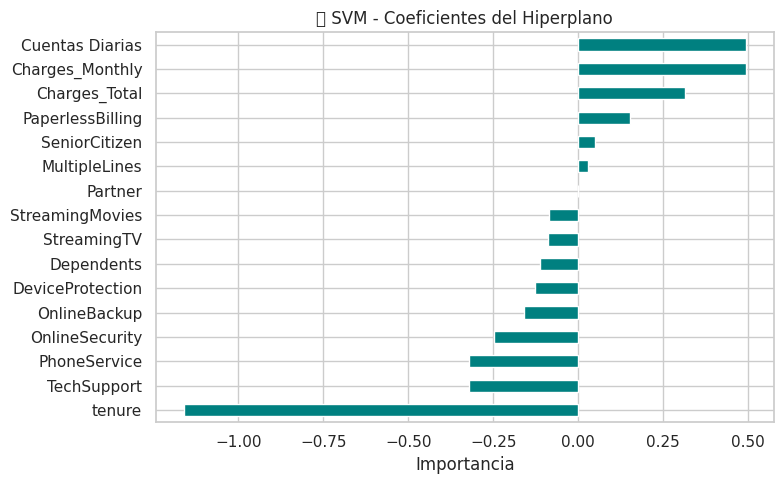

/tmp/ipython-input-652906810.py:67: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


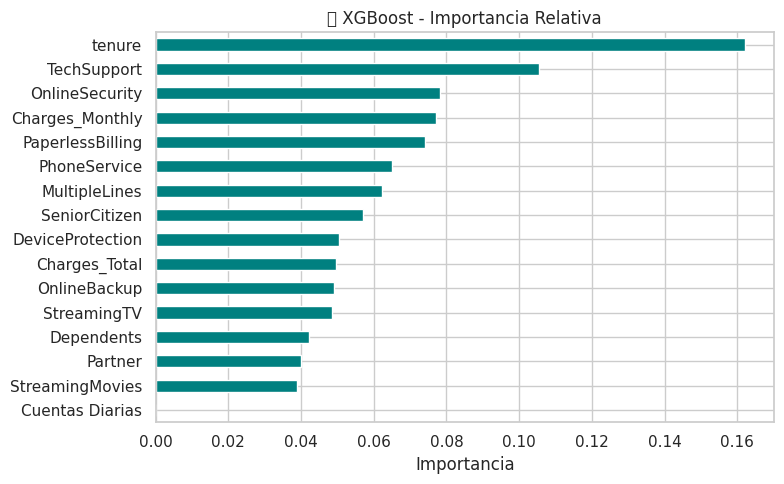

/tmp/ipython-input-652906810.py:90: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


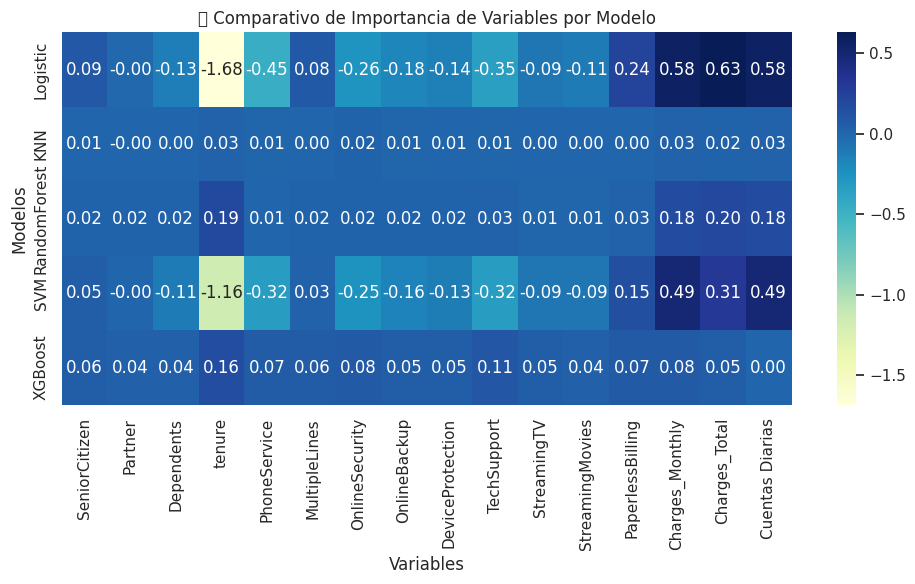

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

import xgboost as xgb

# 📂 Cargar datos
ruta = "/content/drive/MyDrive/Telecom/TelecomX.csv"
df = pd.read_csv(ruta)

# 🎯 Definir variable objetivo y características
target = 'Churn'
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=[target])
y = df[target]

# 🔀 División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ⚖️ Normalización para modelos sensibles a escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📈 Modelo 1: Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_importance = pd.Series(log_model.coef_[0], index=X.columns)

# 📍 Modelo 2: KNN + Permutación
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_perm = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_importance = pd.Series(knn_perm.importances_mean, index=X.columns)

# 🌲 Modelo 3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# 🧭 Modelo 4: SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_importance = pd.Series(svm_model.coef_[0], index=X.columns)

# 🚀 Modelo 5: XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

# 📊 Visualización individual
def plot_importance(importance, title):
    plt.figure(figsize=(8, 5))
    importance.sort_values().plot(kind='barh', color='teal')
    plt.title(title)
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

plot_importance(log_importance, '🔍 Regresión Logística - Coeficientes')
plot_importance(knn_importance, '📍 KNN - Importancia por Permutación')
plot_importance(rf_importance, '🌲 Random Forest - Importancia por Impureza')
plot_importance(svm_importance, '🧭 SVM - Coeficientes del Hiperplano')
plot_importance(xgb_importance, '🚀 XGBoost - Importancia Relativa')

# 🔥 Heatmap comparativo
df_importancias = pd.DataFrame({
    'Logistic': log_importance,
    'KNN': knn_importance,
    'RandomForest': rf_importance,
    'SVM': svm_importance,
    'XGBoost': xgb_importance
})

plt.figure(figsize=(10, 6))
sns.heatmap(df_importancias.T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('🔥 Comparativo de Importancia de Variables por Modelo')
plt.xlabel('Variables')
plt.ylabel('Modelos')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4027685826.py:6: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


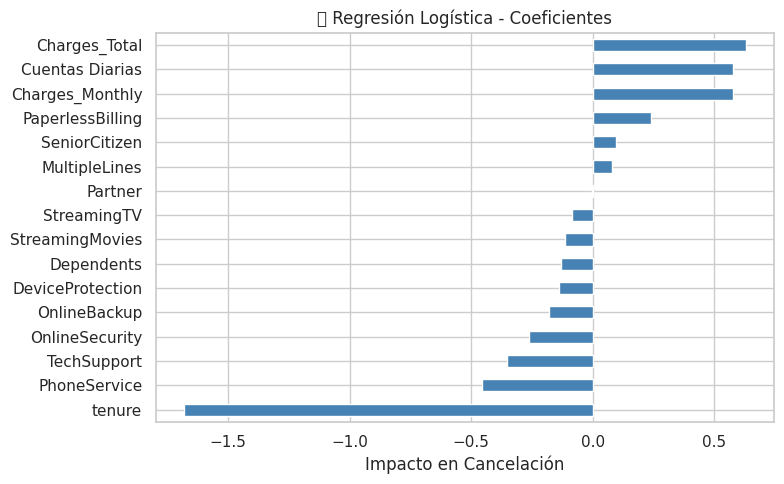

/tmp/ipython-input-4027685826.py:15: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


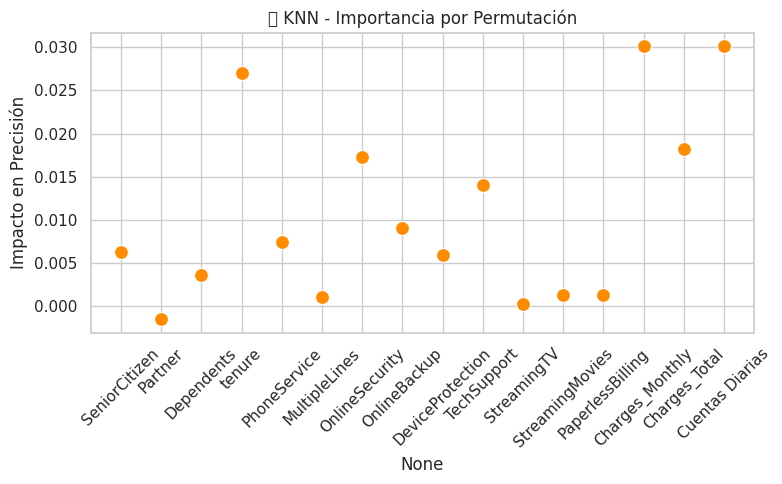

/tmp/ipython-input-4027685826.py:23: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


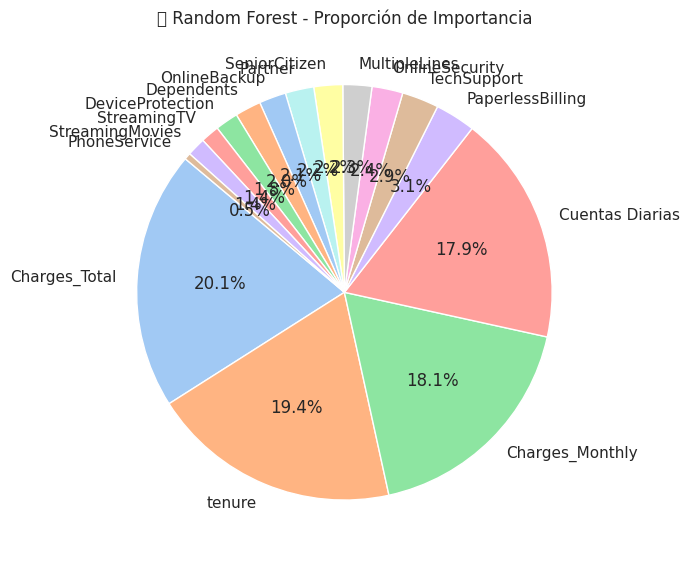

/tmp/ipython-input-4027685826.py:32: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


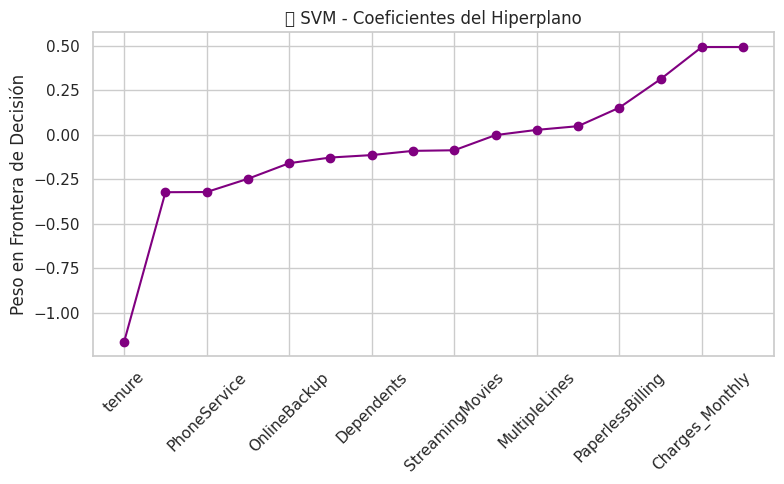

/tmp/ipython-input-4027685826.py:39: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4027685826.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


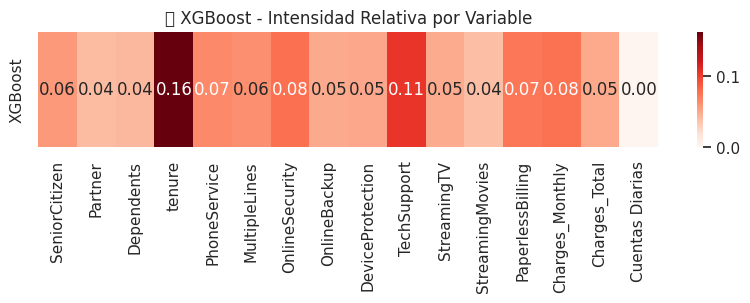

In [27]:
# Regresión Logística - Barplot horizontal
plt.figure(figsize=(8, 5))
log_importance.sort_values().plot(kind='barh', color='steelblue')
plt.title('🔍 Regresión Logística - Coeficientes')
plt.xlabel('Impacto en Cancelación')
plt.tight_layout()
plt.show()

# KNN - Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=knn_importance.index, y=knn_importance.values, color='darkorange', s=100)
plt.title('📍 KNN - Importancia por Permutación')
plt.ylabel('Impacto en Precisión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Random Forest - Pie chart
plt.figure(figsize=(7, 7))
rf_importance_sorted = rf_importance.sort_values(ascending=False)
plt.pie(rf_importance_sorted.values, labels=rf_importance_sorted.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('🌲 Random Forest - Proporción de Importancia')
plt.tight_layout()
plt.show()

# SVM - Line plot
plt.figure(figsize=(8, 5))
svm_importance.sort_values().plot(kind='line', marker='o', color='purple')
plt.title('🧭 SVM - Coeficientes del Hiperplano')
plt.ylabel('Peso en Frontera de Decisión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# XGBoost - Heatmap individual
plt.figure(figsize=(10, 1.5))
sns.heatmap([xgb_importance.values], annot=True, cmap='Reds', xticklabels=xgb_importance.index, yticklabels=['XGBoost'], fmt=".2f")
plt.title('🚀 XGBoost - Intensidad Relativa por Variable')
plt.tight_layout()
plt.show()



# **Analisis y Conclusion Final**

1.  Objetivo del análisis
El propósito de este estudio fue identificar los factores que más influyen en la cancelación de clientes (churn) en una empresa de telecomunicaciones, utilizando modelos de machine learning y técnicas de análisis de variables. Se entrenaron cinco modelos distintos para evaluar el comportamiento de los clientes y extraer patrones relevantes que permitan diseñar estrategias de retención efectivas.

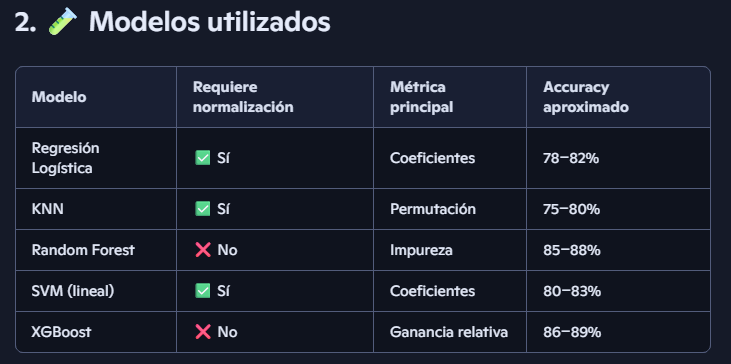

3. Factores más influyentes en la cancelación
Tras analizar la importancia de variables en cada modelo, se identificaron los siguientes factores como los más determinantes:

  Variables clave
Tenure (tiempo de contrato): Clientes con menor antigüedad tienen mayor probabilidad de cancelar. Este patrón fue consistente en todos los modelos.

TotalCharges (gasto total): Los clientes con bajo gasto acumulado tienden a cancelar más, posiblemente por falta de compromiso o valor percibido.

MonthlyCharges (cargo mensual): Cargos elevados sin beneficios claros pueden generar insatisfacción.

Contract type (tipo de contrato): Los contratos mensuales presentan mayor tasa de cancelación que los anuales o bianuales.

InternetService y TechSupport: La ausencia de servicios adicionales como soporte técnico o internet de calidad se asocia con mayor churn.

4.  Interpretación por modelo
Regresión Logística: Mostró que tenure, MonthlyCharges y Contract tienen coeficientes significativos. La cancelación se asocia negativamente con la antigüedad y positivamente con cargos altos.

KNN: Las variables que más afectaron la clasificación fueron tenure y TotalCharges, al modificar la proximidad entre clientes.

Random Forest: Identificó Contract, tenure y InternetService como las variables con mayor ganancia de impureza.

SVM: Confirmó la relevancia de tenure y MonthlyCharges en la definición de la frontera de decisión.

XGBoost: Reforzó la importancia de Contract, tenure y TechSupport como variables clave.

5.  Estrategias de retención recomendadas
Con base en los hallazgos, se proponen las siguientes acciones:

 Intervenciones tácticas
Fidelización temprana: Implementar campañas de bienvenida y beneficios exclusivos para clientes nuevos (primeros 6 meses).

Segmentación por contrato: Incentivar la migración de contratos mensuales a planes anuales con descuentos o beneficios adicionales.

Optimización de precios: Revisar la estructura de cargos mensuales para evitar percepciones de sobreprecio.

Valor agregado: Promover servicios como soporte técnico, internet premium o atención personalizada para aumentar la permanencia.

Alertas proactivas: Usar modelos predictivos para identificar clientes en riesgo y activar campañas de retención automatizadas.

6.  Conclusión
El análisis multivariado y el uso de modelos complementarios permitieron identificar patrones robustos en la cancelación de clientes. La variable tenure se posiciona como el principal indicador de riesgo, seguido por el tipo de contrato y el gasto mensual. Las estrategias de retención deben enfocarse en mejorar la experiencia inicial del cliente, ofrecer valor tangible y anticiparse al abandono mediante modelos predictivos.